In [14]:
import numpy as np

# until ~2450 rocket isn't in main phase so it's useless noise
xr = np.genfromtxt('rollControl/Roll-Control/Plotting/DerivativesandSmoothing/FT1_primary.csv', delimiter=',')[2450:,4]
yr = np.genfromtxt('rollControl/Roll-Control/Plotting/DerivativesandSmoothing/FT1_primary.csv', delimiter=',')[2450:,19]

2.9880914925507123e-05


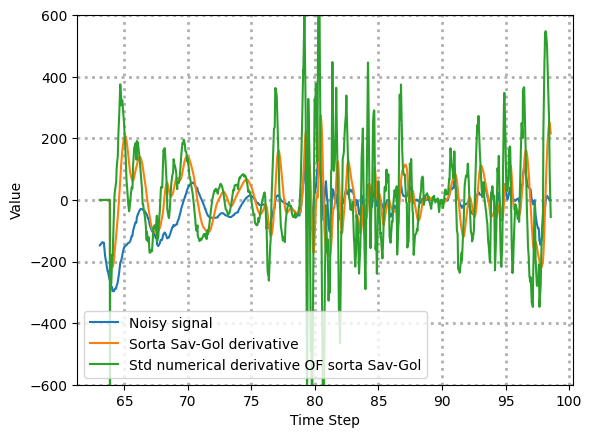

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
warnings.simplefilter('ignore', np.exceptions.RankWarning)

xres = 0.01

# interpolates (x,y) at xres
x = np.arange(xr[0],xr[-1],xres)
y = np.interp(x,xr,yr)

totalTime = 0

# this because i'm not a good programmer
dy = 0 * y
fy = 0 * y
nfy = 0 * y
ny = 0 * y

# sorta Sav-Gol
winSize = 80
for i in range(winSize,len(y)):
    start_time = time.perf_counter()
    ywin = y[i-winSize:i] - [0]*winSize
    xwin = x[i-winSize:i] - [x[i]]*winSize
    py = np.polyfit(xwin,ywin,1)
    dy[i] = py[0]
    fy[i] = py[1]
    # std numerical derivative OF sorta Sav-Gol
    nfy[i] = (fy[i]-fy[i-1])/xres
    totalTime += time.perf_counter() - start_time

print(totalTime / len(y))

plt.ylim(-600,600)

plt.plot(x, y, label='Noisy signal')
#plt.plot(x, fy, label='Sorta Sav-Gol smoothing')
plt.plot(x, dy, label='Sorta Sav-Gol derivative')
plt.plot(x, nfy, label='Std numerical derivative OF sorta Sav-Gol')
#plt.plot(x, ny, label='Std numerical derivative')
plt.grid(lw=2,ls=':')
plt.xlabel('Time Step')
plt.ylabel("Value")
plt.legend()
plt.show()
